In [56]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df_num = pd.read_csv('./df_num.csv')
df_fraud = pd.read_csv('./train.csv')

In [9]:
df_num.columns

Index(['Unnamed: 0', 'BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt',
       'Provider', 'InscClaimAmtReimbursed', 'AttendingPhysician',
       'OperatingPhysician', 'OtherPhysician', 'AdmissionDt',
       'ClmAdmitDiagnosisCode', 'DeductibleAmtPaid', 'DischargeDt',
       'DiagnosisGroupCode', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2',
       'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5',
       'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8',
       'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10', 'ClmProcedureCode_1',
       'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4',
       'ClmProcedureCode_5', 'ClmProcedureCode_6', 'In_Out', 'DOB', 'DOD',
       'Gender', 'Race', 'RenalDiseaseIndicator', 'State', 'County',
       'NoOfMonths_PartACov', 'NoOfMonths_PartBCov', 'ChronicCond_Alzheimer',
       'ChronicCond_Heartfailure', 'ChronicCond_KidneyDisease',
       'ChronicCond_Cancer', 'ChronicCond_ObstrPulmonary',
       'ChronicCond_

In [10]:
df_num.shape

(558211, 57)

In [54]:
df=df_num.groupby('Provider')[['ClaimID']].count()
df=df.reset_index()
df.shape

(5410, 2)

In [65]:
df.dtypes

Provider    object
ClaimID      int64
dtype: object

In [66]:
df_fraud.dtypes

Provider          object
PotentialFraud    object
dtype: object

In [69]:
df_merged=df.merge(df_fraud,on = 'Provider', how='left')

In [126]:
df_merged.sort_values(by=['ClaimID']).tail(20)

,Provider,ClaimID,PotentialFraud
818,PRV52019,1961,Yes
4861,PRV57103,2049,Yes
3221,PRV55039,2058,Yes
273,PRV51347,2067,Yes
292,PRV51369,2083,Yes
1307,PRV52628,2098,Yes
3018,PRV54772,2115,Yes
1325,PRV52649,2156,Yes
828,PRV52030,2275,Yes
4446,PRV56560,2313,Yes


In [127]:
max(df_merged[df_merged['PotentialFraud']=='Yes']['ClaimID'])

8240

In [128]:
min(df_merged[df_merged['PotentialFraud']=='Yes']['ClaimID'])

1

In [129]:
max(df_merged[df_merged['PotentialFraud']=='No']['ClaimID'])

1245

In [130]:
min(df_merged[df_merged['PotentialFraud']=='No']['ClaimID'])

1

<AxesSubplot:xlabel='ClaimID', ylabel='PotentialFraud'>

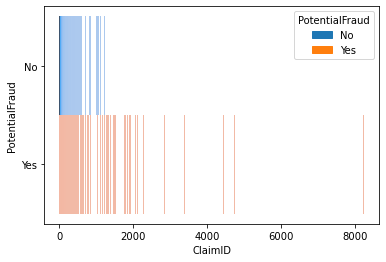

In [76]:
sns.histplot(data=df_merged,y='PotentialFraud',x='ClaimID',hue='PotentialFraud')

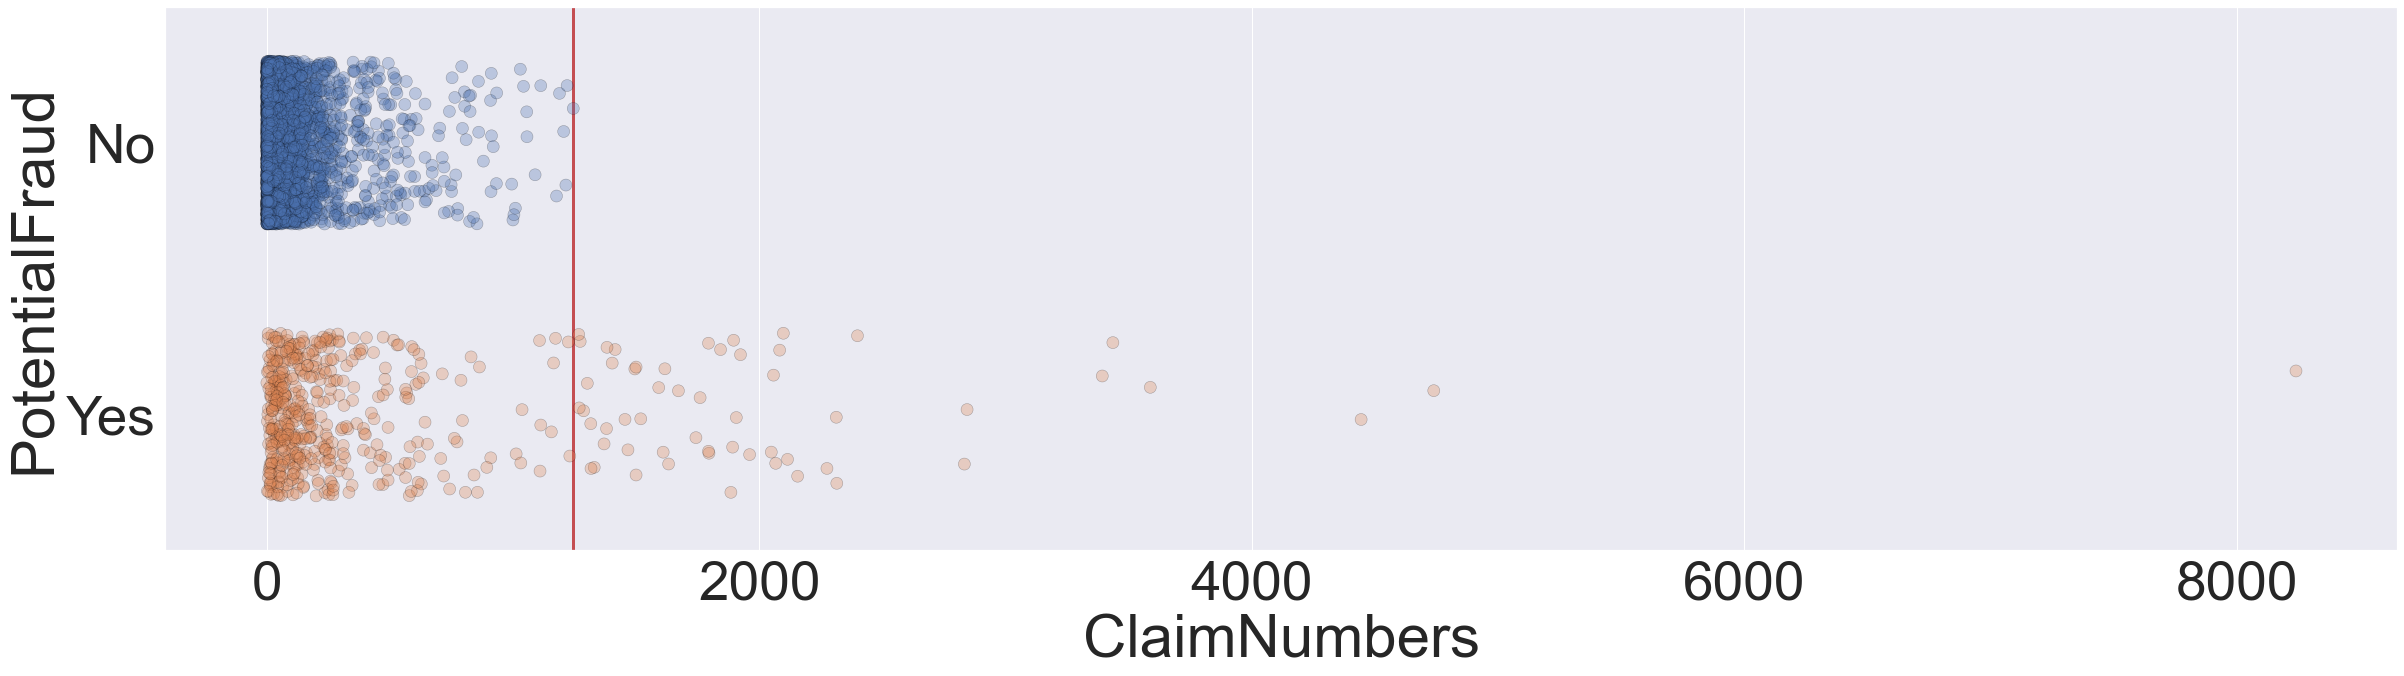

In [134]:


sns.set(rc={'figure.figsize':(40,10)})
sns.set(font_scale=5)
ax=sns.stripplot(data=df_merged,y='PotentialFraud',x='ClaimID', 
                 jitter=0.3,alpha = .3,s=12,edgecolor="black",linewidth=0.5)
#ax = sns.boxplot(data=df_merged,y='PotentialFraud',x='ClaimID', whis=np.inf)
#ax = sns.violinplot(data=df_merged,y='PotentialFraud',x='ClaimID',inner=None, color=".8")
ax.axvline(1245, c="r", linewidth=3)
plt.xlabel("ClaimNumbers")
plt.savefig('./pics/Provider_ClaimNumber')